In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from feed_forward import fit_model, open_csv, plot_training_set, plot_history, preprocess, build_model, normalize_dataset

1.14.0


In [15]:
train_dataset, test_dataset, train_labels, test_labels = preprocess(open_csv("../../data/dataset.csv"))
normed_train_data, normed_test_data = normalize_dataset(train_dataset, test_dataset)

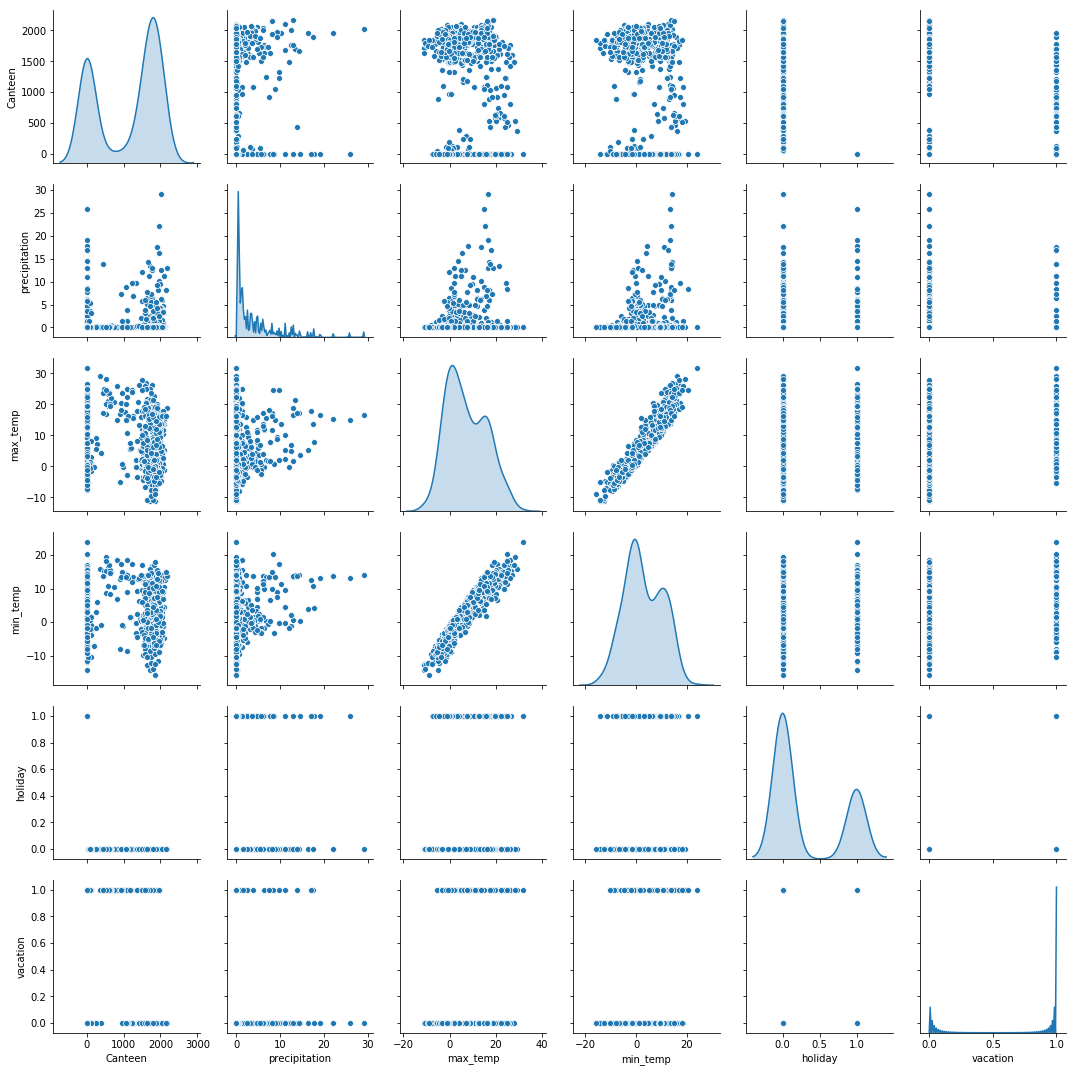

In [3]:
plot_training_set(pd.merge(train_labels,train_dataset, left_index=True, right_index=True))

In [4]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
precipitation,696.0,1.141092,3.200761,0.0,0.0,0.00,0.4,29.1
max_temp,696.0,7.308046,8.578526,-11.3,0.3,5.95,14.6,31.7
min_temp,696.0,2.961782,7.415347,-15.8,-2.6,1.70,9.3,23.9
holiday,696.0,0.323276,0.468063,0.0,0.0,0.00,1.0,1.0
vacation,696.0,0.113506,0.317438,0.0,0.0,0.00,0.0,1.0


In [5]:
model = build_model(train_dataset)

W0701 16:04:03.806792 140736101372800 deprecation.py:506] From /usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [7]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12838   ],
       [ 0.05808695],
       [-0.1512387 ],
       [ 0.07101031],
       [-0.26727486],
       [-0.22770025],
       [ 0.06815683],
       [-0.28203416],
       [-0.26548392],
       [-0.3183211 ]], dtype=float32)

In [8]:
history = fit_model(model, normed_train_data, train_labels)


....................................................................................................
..

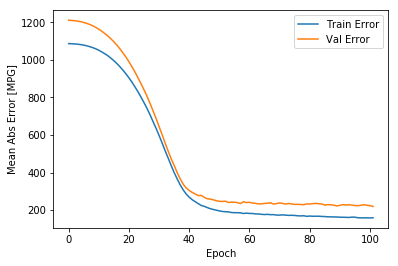

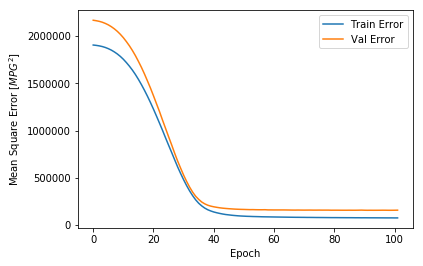

In [9]:
plot_history(history)

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
97,76138.245391,158.355011,76138.250000,157023.243750,225.346161,157023.250000,97
98,76054.746810,158.442825,76054.750000,156543.196484,228.625748,156543.203125,98
99,76163.342148,158.396988,76163.335938,156625.876953,225.376694,156625.875000,99
100,75731.937275,158.088852,75731.937500,156928.219643,223.357147,156928.218750,100
101,75790.347207,158.690018,75790.351562,157670.108036,219.114838,157670.109375,101


In [11]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error: 146.91 MPG


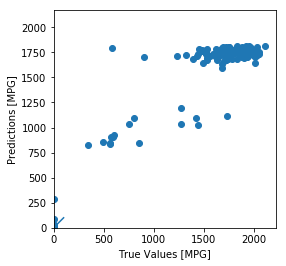

In [12]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(list(test_labels["Canteen"]), test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

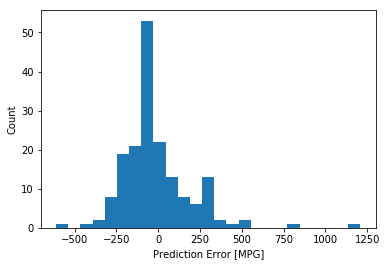

In [13]:
error = test_predictions - list(test_labels["Canteen"]) #test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")